In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL.ExifTags import TAGS
import pandas as pd
import os
from glob import glob
from gistool import get_GPS, get_datetime
%matplotlib inline

In [2]:
# 画像パラメータ
POLE_RADIUS = 6356752.314   #極半径
EQUATOR_RADIUS = 6378137    #赤道半径

In [3]:
imgpath = os.path.join(os.getcwd(), "img")
imglst = glob(os.path.join(imgpath, '*.JPG'))
flst = [os.path.basename(f) for f in imglst]
df = pd.DataFrame(imglst, columns=["fpath"])
df['fname'] = df['fpath'].map(os.path.basename)

gps_keys = ['lat', 'lon', 'alt']
for k in gps_keys:
    df[k] = df['fpath'].map(get_GPS).apply(pd.Series)[k].apply(pd.Series)
df['DateTime'] = df['fpath'].map(get_datetime)
# df.to_csv('file_list.csv', columns=['fname', 'DateTime', 'lat', 'lon', 'alt'])

height_lst = [0, 5, 10, 20, 40, 60, 80, 100, 130, 150]

In [24]:
%run drone-dataframe.py

In [4]:
df.head()

,fpath,fname,lat,lon,alt,DateTime
0,C:\Users\takeshi\pyworks\drone\img\DJI_0001.JPG,DJI_0001.JPG,35.699255,139.235553,184.784,2017:10:02 09:04:12
1,C:\Users\takeshi\pyworks\drone\img\DJI_0002.JPG,DJI_0002.JPG,35.699253,139.235551,184.791,2017:10:02 09:04:15
2,C:\Users\takeshi\pyworks\drone\img\DJI_0003.JPG,DJI_0003.JPG,35.699253,139.235550,184.781,2017:10:02 09:04:19
3,C:\Users\takeshi\pyworks\drone\img\DJI_0004.JPG,DJI_0004.JPG,35.699247,139.235544,189.773,2017:10:02 09:06:07
4,C:\Users\takeshi\pyworks\drone\img\DJI_0005.JPG,DJI_0005.JPG,35.699248,139.235543,189.773,2017:10:02 09:06:09


In [5]:
df['height'] = df.alt - df.alt.loc[0]

In [6]:
df.head()

,fpath,fname,lat,lon,alt,DateTime,height
0,C:\Users\takeshi\pyworks\drone\img\DJI_0001.JPG,DJI_0001.JPG,35.699255,139.235553,184.784,2017:10:02 09:04:12,0.000
1,C:\Users\takeshi\pyworks\drone\img\DJI_0002.JPG,DJI_0002.JPG,35.699253,139.235551,184.791,2017:10:02 09:04:15,0.007
2,C:\Users\takeshi\pyworks\drone\img\DJI_0003.JPG,DJI_0003.JPG,35.699253,139.235550,184.781,2017:10:02 09:04:19,-0.003
3,C:\Users\takeshi\pyworks\drone\img\DJI_0004.JPG,DJI_0004.JPG,35.699247,139.235544,189.773,2017:10:02 09:06:07,4.989
4,C:\Users\takeshi\pyworks\drone\img\DJI_0005.JPG,DJI_0005.JPG,35.699248,139.235543,189.773,2017:10:02 09:06:09,4.989


In [7]:
df.describe()

,lat,lon,alt,height
count,332.000000,332.000000,332.000000,332.000000
mean,35.699361,139.235478,257.970669,73.186669
std,0.000151,0.000209,46.675937,46.675937
min,35.699082,139.234984,184.740000,-0.044000
25%,35.699241,139.235341,204.717000,19.933000
50%,35.699330,139.235496,261.054000,76.270000
75%,35.699466,139.235588,316.155000,131.371000
max,35.699717,139.235929,336.255000,151.471000


In [8]:
df_xlsx = pd.read_excel('実験データ解析_20171002.xlsx', skiprows=2, index_col=0)
del df_xlsx['exp_pattern']
del df_xlsx['lens']
del df_xlsx['memo']
df_xlsx.head()

,fname,DateTime,lat,lon,alt,height
ID,,,,,,
0,DJI_0001.JPG,2017:10:02 09:04:12,35.699255,139.235553,184.784,0.000
1,DJI_0002.JPG,2017:10:02 09:04:15,35.699253,139.235551,184.791,0.007
2,DJI_0003.JPG,2017:10:02 09:04:19,35.699253,139.235550,184.781,-0.003
3,DJI_0004.JPG,2017:10:02 09:06:07,35.699247,139.235544,189.773,4.989
4,DJI_0005.JPG,2017:10:02 09:06:09,35.699248,139.235543,189.773,4.989


In [9]:
exp1 = df.loc[0:2]
exp1.head()

,fpath,fname,lat,lon,alt,DateTime,height
0,C:\Users\takeshi\pyworks\drone\img\DJI_0001.JPG,DJI_0001.JPG,35.699255,139.235553,184.784,2017:10:02 09:04:12,0.000
1,C:\Users\takeshi\pyworks\drone\img\DJI_0002.JPG,DJI_0002.JPG,35.699253,139.235551,184.791,2017:10:02 09:04:15,0.007
2,C:\Users\takeshi\pyworks\drone\img\DJI_0003.JPG,DJI_0003.JPG,35.699253,139.235550,184.781,2017:10:02 09:04:19,-0.003


In [10]:
exp1.describe()

,lat,lon,alt,height
count,3.000000,3.000000,3.000000,3.000000
mean,35.699254,139.235551,184.785333,0.001333
std,0.000001,0.000002,0.005132,0.005132
min,35.699253,139.235550,184.781000,-0.003000
25%,35.699253,139.235550,184.782500,-0.001500
50%,35.699253,139.235551,184.784000,0.000000
75%,35.699254,139.235552,184.787500,0.003500
max,35.699255,139.235553,184.791000,0.007000


In [11]:
latdeg = exp1.lat.max() - exp1.lat.min()
londeg = exp1.lon.max() - exp1.lon.min()
latdeg, londeg
# delta-lon = exp_df1['lon'].max() - exp_df1['lon'].min()
# print(delta-lat, delta-lon)

(2.0000000020559128e-06, 3.0000000208474376e-06)

In [12]:
lat0 = exp1['lat'].mean()
lon0 = exp1['lon'].mean()
from math import pi, cos, sin
latdis = latdeg * (EQUATOR_RADIUS * cos(lat0 * pi / 180.0)) * pi / 180.0
londis = londeg * POLE_RADIUS / 180 * pi
print(latdis, londis)

0.180803141883 0.332838775152


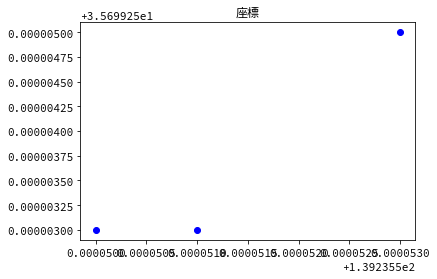

In [13]:
fig = plt.figure()
plt.plot(exp1['lon'], exp1['lat'], 'bo')
plt.title('座標')

In [ ]:
d_1m = 1
theta = d_1m * 180 / (pi * EQUATOR_RADIUS * cos(lat0 * pi / 180.0))

In [ ]:
theta